In [1]:
import pandas as pd

In [2]:
mcdonalds = pd.read_csv("mcdonalds.csv")

In [3]:
print(mcdonalds.columns.tolist())

['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']


In [7]:
print(mcdonalds.shape)

(1453, 15)


In [9]:
print(mcdonalds.head(3))

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [11]:
MD_x = (mcdonalds.iloc[:, :11] == "Yes").astype(int).values
column_means = np.round(np.mean(MD_x, axis=0), 2)
print(column_means)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


In [13]:
pca = PCA()
pca.fit(MD_x)

<IPython.core.display.Javascript object>

PCA()

In [14]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
summary_df = pd.DataFrame({
    'Standard Deviation': np.sqrt(pca.explained_variance_),
    'Proportion of Variance': explained_variance,
    'Cumulative Proportion': cumulative_variance
})
print(summary_df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

    Standard Deviation  Proportion of Variance  Cumulative Proportion
0             0.757050                0.299447               0.299447
1             0.607456                0.192797               0.492244
2             0.504619                0.133045               0.625290
3             0.398799                0.083096               0.708386
4             0.337405                0.059481               0.767866
5             0.310275                0.050300               0.818166
6             0.289697                0.043849               0.862015
7             0.275122                0.039548               0.901563
8             0.265251                0.036761               0.938323
9             0.248842                0.032353               0.970677
10            0.236903                0.029323               1.000000


In [15]:
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)],
                        index=mcdonalds.columns[:11])
print(loadings.round(2))

             PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  PC10  PC11
yummy      -0.48  0.36 -0.30  0.06 -0.31  0.17 -0.28  0.01  0.57 -0.11  0.05
convenient -0.16  0.02 -0.06 -0.14  0.28 -0.35 -0.06 -0.11 -0.02 -0.67 -0.54
spicy      -0.01  0.02 -0.04  0.20  0.07 -0.36  0.71  0.38  0.40 -0.08  0.14
fattening   0.12 -0.03 -0.32 -0.35 -0.07 -0.41 -0.39  0.59 -0.16 -0.01  0.25
greasy      0.30 -0.06 -0.80  0.25  0.36  0.21  0.04 -0.14 -0.00  0.01  0.00
fast       -0.11 -0.09 -0.06 -0.10  0.11 -0.59 -0.09 -0.63  0.17  0.24  0.34
cheap      -0.34 -0.61 -0.15  0.12 -0.13 -0.10 -0.04  0.14  0.08  0.43 -0.49
tasty      -0.47  0.31 -0.29 -0.00 -0.21 -0.08  0.36 -0.07 -0.64  0.08  0.02
expensive   0.33  0.60  0.02  0.07 -0.00 -0.26 -0.07  0.03  0.07  0.45 -0.49
healthy    -0.21  0.08  0.19  0.76  0.29 -0.18 -0.35  0.18 -0.19 -0.04  0.16
disgusting  0.37 -0.14 -0.09  0.37 -0.73 -0.21 -0.03 -0.17 -0.07 -0.29 -0.04


In [19]:
MD_pca_projection = pca.transform(MD_x)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

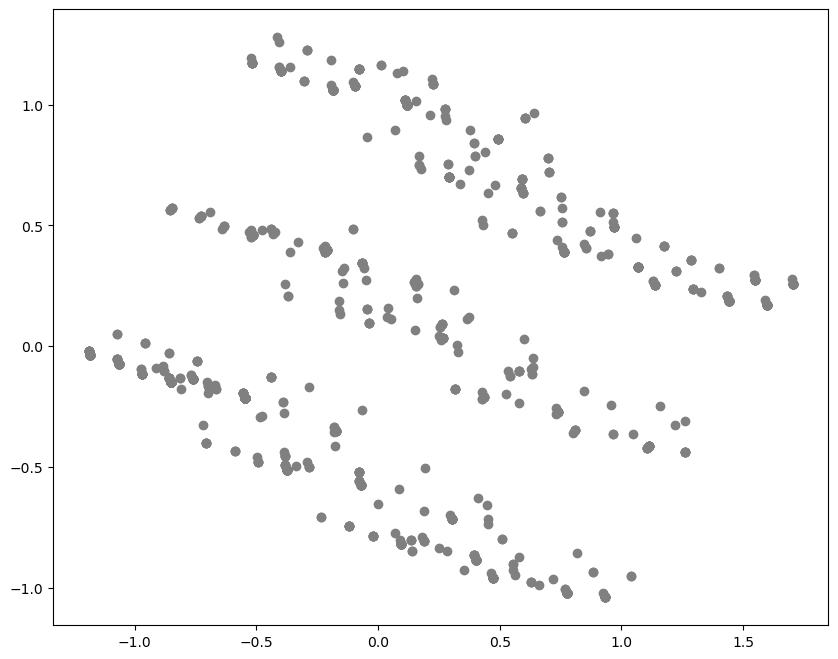

In [21]:
plt.figure(figsize=(10, 8))
plt.scatter(MD_pca_projection[:, 0], MD_pca_projection[:, 1], color='grey')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

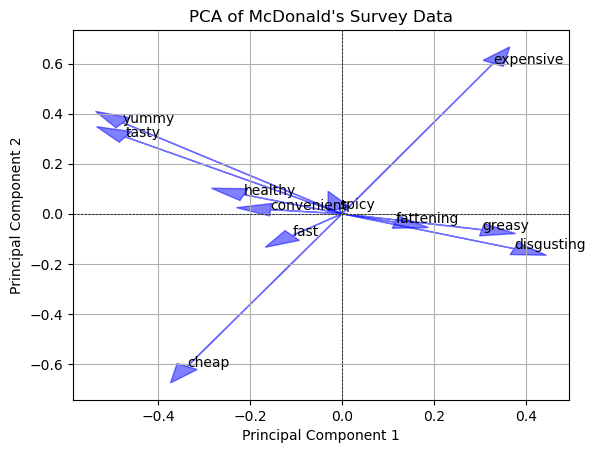

In [23]:
for i in range(loadings.shape[0]):
    plt.arrow(0, 0, loadings.iloc[i, 0], loadings.iloc[i, 1], 
              color='blue', alpha=0.5, head_width=0.05)
    plt.text(loadings.iloc[i, 0], loadings.iloc[i, 1], loadings.index[i], 
             color='black')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of McDonald\'s Survey Data')
plt.grid()
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.show()

C:\Users\Vayun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


MD_pca shape: (10, 2)
MD_k4 shape: (10,)


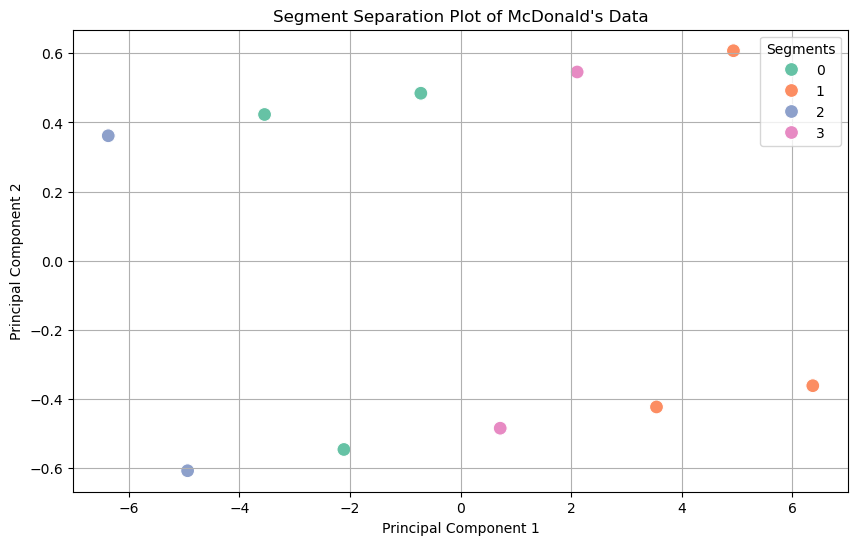

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
numerical_features = mcdonalds.select_dtypes(include=[np.number])

pca = PCA(n_components=2)
MD_pca = pca.fit_transform(numerical_features)

n_clusters = 4  
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
MD_k4 = kmeans.fit_predict(numerical_features)

print("MD_pca shape:", MD_pca.shape)  
print("MD_k4 shape:", MD_k4.shape)   

plt.figure(figsize=(10, 6))
sns.scatterplot(x=MD_pca[:, 0], y=MD_pca[:, 1], hue=MD_k4, palette='Set2', s=100)
plt.title('Segment Separation Plot of McDonald\'s Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Segments')
plt.grid(True)
plt.show()


C:\Users\Vayun\AppData\Local\Temp\ipykernel_31668\1623263511.py:34: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=segment_profiles, palette='Set2', ci=None)


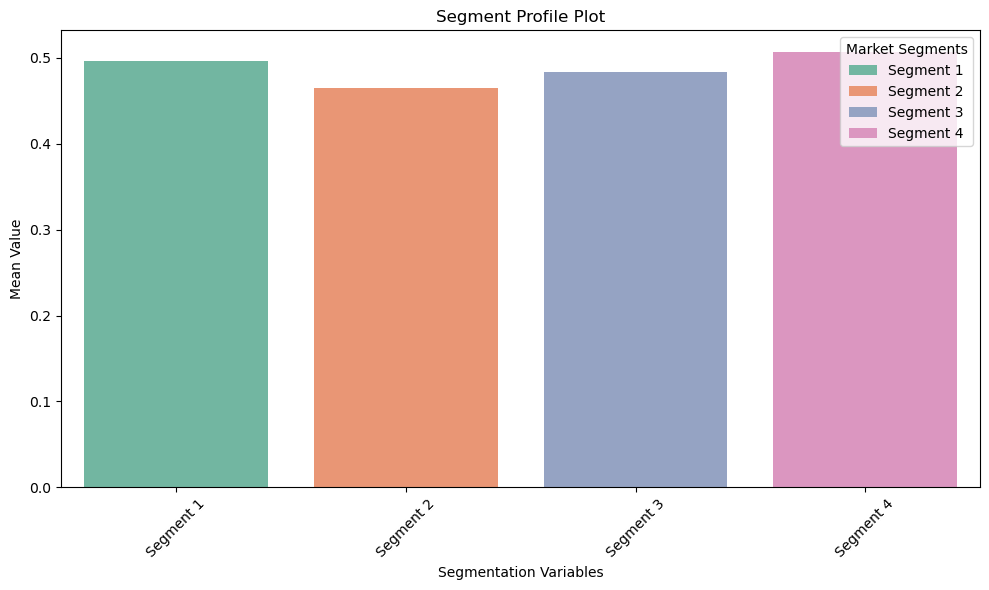

ValueError: All arrays must be of the same length

<Figure size 1000x600 with 0 Axes>

In [49]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist


np.random.seed(42)  
MD_x = np.random.rand(100, 10)  



dist_matrix = pdist(MD_x.T)  

linkage_matrix = linkage(dist_matrix, method='ward')

n_clusters = 4
clustering = AgglomerativeClustering(n_clusters=n_clusters)
MD_k4 = clustering.fit_predict(MD_x.T)  # Fit on transposed data

segment_profiles = pd.DataFrame(columns=[f'Segment {i+1}' for i in range(n_clusters)])

for cluster in range(n_clusters):
    segment_profiles[f'Segment {cluster + 1}'] = MD_x.T[MD_k4 == cluster].mean(axis=0)


plt.figure(figsize=(10, 6))

ordered_indices = np.argsort(clustering.labels_)
sns.barplot(data=segment_profiles, palette='Set2', ci=None)

plt.xlabel('Segmentation Variables')
plt.ylabel('Mean Value')
plt.title('Segment Profile Plot')
plt.xticks(rotation=45)
plt.legend(title='Market Segments', labels=[f'Segment {i+1}' for i in range(n_clusters)], loc='upper right')
plt.tight_layout()
plt.show()


pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x)


plt.figure(figsize=(10, 6))
sns.scatterplot(x=MD_pca[:, 0], y=MD_pca[:, 1], hue=MD_k4, palette='Set2', s=100)
plt.title('Segment Separation Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.legend(title='Market Segments', labels=[f'Segment {i+1}' for i in range(n_clusters)])
plt.tight_layout()
plt.show()